## MRNet Exploratory Data Analysis

#### Inspect the files

In [1]:
# Explore the directory structure and files in the dataset MRNet
!tree -L 2 Data/MRNet-v1.0/

Data/MRNet-v1.0/
├── train
│   ├── axial
│   ├── coronal
│   └── sagittal
├── train-abnormal.csv
├── train-acl.csv
├── train-meniscus.csv
├── valid
│   ├── axial
│   ├── coronal
│   └── sagittal
├── valid-abnormal.csv
├── valid-acl.csv
└── valid-meniscus.csv

9 directories, 6 files


#### Inspect the MRIs

In [2]:
import os
import platform
from glob import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
data_dir = 'Data/MRNet-v1.0'
train_data_path = os.path.join(data_dir, 'train')
valid_data_path = os.path.join(data_dir, 'valid')

In [4]:
planes = ['axial', 'coronal', 'sagittal']
datasets = {'train': train_data_path, 'valid': valid_data_path}

In [5]:
for dataset, path in datasets.items():
    print(f"\nTotal exams in {dataset.upper()}")
    for plane in planes:
        print(f"{plane:8} plane : {len(glob(f'{os.path.join(path, plane)}/*.npy'))}")


Total exams in TRAIN
axial    plane : 1130
coronal  plane : 1130
sagittal plane : 1130

Total exams in VALID
axial    plane : 120
coronal  plane : 120
sagittal plane : 120


#### Inspecting the number of slices for different planes

In [7]:
def get_slices_per_exam(exams):
    """
    This function gets number of slices found in MRIs
    of the MRNet dataset.

    Args:
        exams (list): List of files in MRNet dataset

    Returns:
        NumPy array: Array of slices per exam
    """
    num_slices_per_exam = []
    for exam in exams:
        mri_vol = np.load(exam)
        num_slices_per_exam.append(mri_vol.shape[0])
    return np.asarray(num_slices_per_exam)

In [8]:
def plot_slices_per_exam(dataset):
    """
    This function plots the distibution of slices found in MRIs
    of the MRNet dataset.

    Args:
        dataset (str): Path to either train or valid MRNet dataset
    """
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    for i, plane in enumerate(planes):
        num_slices = get_slices_per_exam(glob(f"{dataset}/{plane}/*.npy"))
        print(f"For {dataset.upper()} {plane} plane min : {num_slices.min()}, max : {num_slices.max()}, avg : {num_slices.mean()}")
        sns.histplot(num_slices, stat='density', ax=axes[i], kde=True)
        axes[i].set_title(f"{plane.title()} Plane")

For DATA/MRNET-V1.0\TRAIN axial plane min : 19, max : 61, avg : 34.316814159292036
For DATA/MRNET-V1.0\TRAIN coronal plane min : 17, max : 58, avg : 29.77787610619469
For DATA/MRNET-V1.0\TRAIN sagittal plane min : 17, max : 51, avg : 30.41592920353982


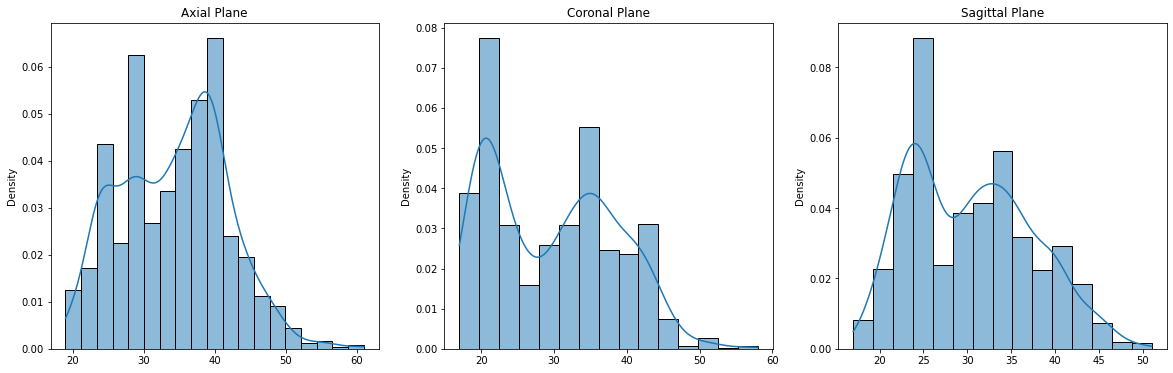

In [9]:
# TRAIN DATASET
plot_slices_per_exam(datasets['train'])

For DATA/MRNET-V1.0\VALID axial plane min : 20, max : 52, avg : 34.31666666666667
For DATA/MRNET-V1.0\VALID coronal plane min : 17, max : 48, avg : 29.425
For DATA/MRNET-V1.0\VALID sagittal plane min : 21, max : 45, avg : 30.525


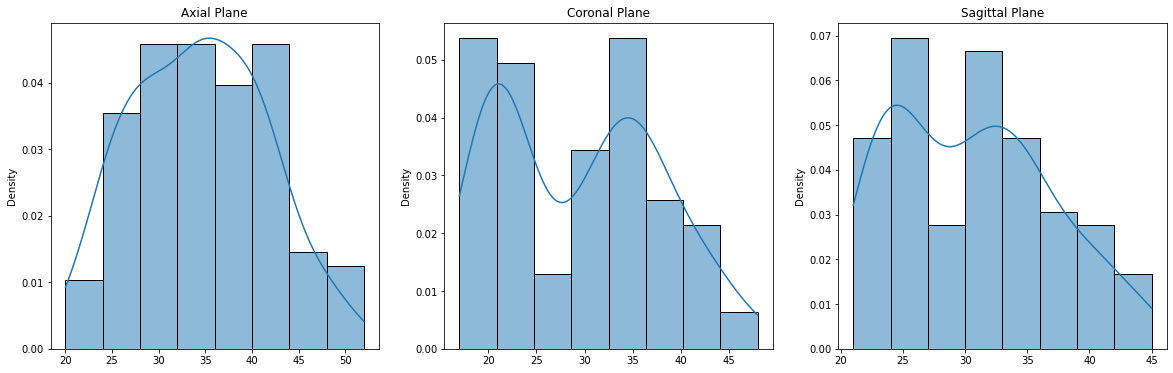

In [10]:
# VALID DATASET
plot_slices_per_exam(datasets['valid'])

#### Inspecting CSVs

In [12]:
# TRAIN DATASET
label_categories = ['abnormal', 'acl', 'meniscus']

In [13]:
for label in label_categories:
    if label == 'abnormal':
        train_abnormal_df = pd.read_csv(f"{data_dir}/train-{label}.csv",
                                        header=None,
                                        names=['Case', 'Abnormal'],
                                        dtype={'Case': str, 'Abnormal': np.int64})
    elif label == 'acl':
        train_acl_df = pd.read_csv(f"{data_dir}/train-{label}.csv",
                                   header=None,
                                   names=['Case', 'ACL'],
                                   dtype={'Case': str, 'ACL': np.int64})
    if label == 'meniscus':
        train_meniscus_df = pd.read_csv(f"{data_dir}/train-{label}.csv",
                                        header=None,
                                        names=['Case', 'Meniscus'],
                                        dtype={'Case': str, 'Meniscus': np.int64})

In [14]:
train_abnormal_df['Abnormal'].value_counts()

1    913
0    217
Name: Abnormal, dtype: int64

In [15]:
train_acl_df['ACL'].value_counts()

0    922
1    208
Name: ACL, dtype: int64

In [16]:
train_meniscus_df['Meniscus'].value_counts()

0    733
1    397
Name: Meniscus, dtype: int64

In [17]:
train_df = pd.merge(train_abnormal_df, train_acl_df, on='Case').merge(train_meniscus_df, on='Case')

In [18]:
train_df

,Case,Abnormal,ACL,Meniscus
0,0000,1,0,0
1,0001,1,1,1
2,0002,1,0,0
3,0003,1,0,1
4,0004,1,0,0
...,...,...,...,...
1125,1125,1,0,1
1126,1126,1,0,1
1127,1127,0,0,0
1128,1128,1,0,0


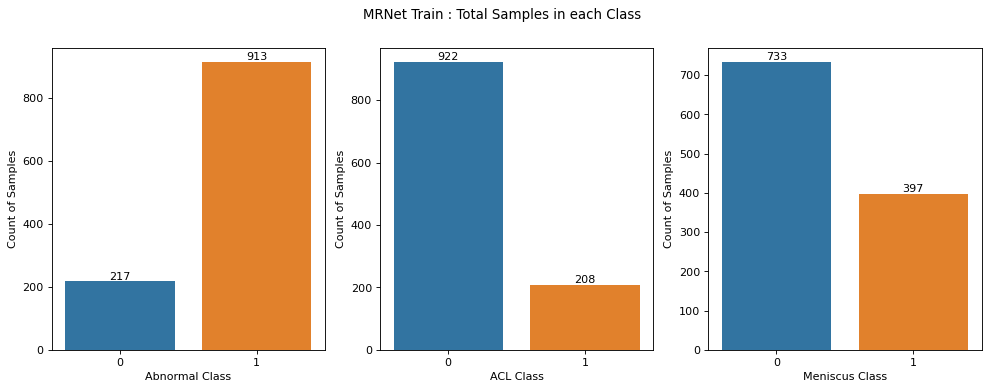

In [60]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5), dpi=80)
fig.suptitle('MRNet Train : Total Samples in each Class')

# First graph
sns.countplot(data = train_df, x='Abnormal', ax=ax[0])
ax[0].bar_label(ax[0].containers[0])
ax[0].set_xlabel('Abnormal Class')
ax[0].set_ylabel('Count of Samples')

# Second graph
sns.countplot(data = train_df, x='ACL', ax=ax[1])
ax[1].bar_label(ax[1].containers[0])
ax[1].set_xlabel('ACL Class')
ax[1].set_ylabel('Count of Samples')

# Third graph
sns.countplot(data = train_df, x='Meniscus', ax=ax[2])
ax[2].bar_label(ax[2].containers[0])
ax[2].set_xlabel('Meniscus Class')
ax[2].set_ylabel('Count of Samples')

plt.show()

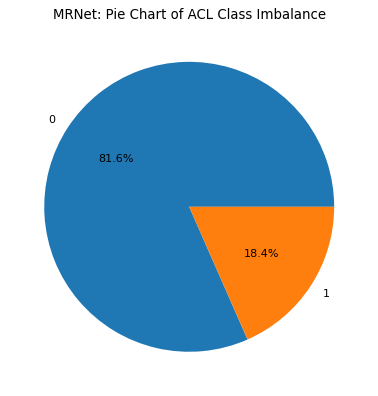

In [56]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=80)
ax.pie(x=train_df['ACL'].value_counts(), 
       labels=train_df['ACL'].value_counts().index,
       autopct='%.1f%%')
ax.set_title('MRNet Train : Pie Chart of ACL Class Imbalance')
plt.show()

In [19]:
# VALID DATASET
for label in label_categories:
    if label == 'abnormal':
        valid_abnormal_df = pd.read_csv(f"{data_dir}/valid-{label}.csv",
                                        header=None,
                                        names=['Case', 'Abnormal'],
                                        dtype={'Case': str, 'Abnormal': np.int64})
    elif label == 'acl':
        valid_acl_df = pd.read_csv(f"{data_dir}/valid-{label}.csv",
                                   header=None,
                                   names=['Case', 'ACL'],
                                   dtype={'Case': str, 'ACL': np.int64})
    if label == 'meniscus':
        valid_meniscus_df = pd.read_csv(f"{data_dir}/valid-{label}.csv",
                                        header=None,
                                        names=['Case', 'Meniscus'],
                                        dtype={'Case': str, 'Meniscus': np.int64})

In [20]:
valid_abnormal_df['Abnormal'].value_counts()

1    95
0    25
Name: Abnormal, dtype: int64

In [21]:
valid_acl_df['ACL'].value_counts()

0    66
1    54
Name: ACL, dtype: int64

In [22]:
valid_meniscus_df['Meniscus'].value_counts()

0    68
1    52
Name: Meniscus, dtype: int64

In [23]:
valid_df = pd.merge(valid_abnormal_df, valid_acl_df, on='Case').merge(valid_meniscus_df, on='Case')

In [24]:
valid_df

,Case,Abnormal,ACL,Meniscus
0,1130,0,0,0
1,1131,0,0,0
2,1132,0,0,0
3,1133,0,0,0
4,1134,0,0,0
...,...,...,...,...
115,1245,1,1,1
116,1246,1,1,1
117,1247,1,0,1
118,1248,1,1,1


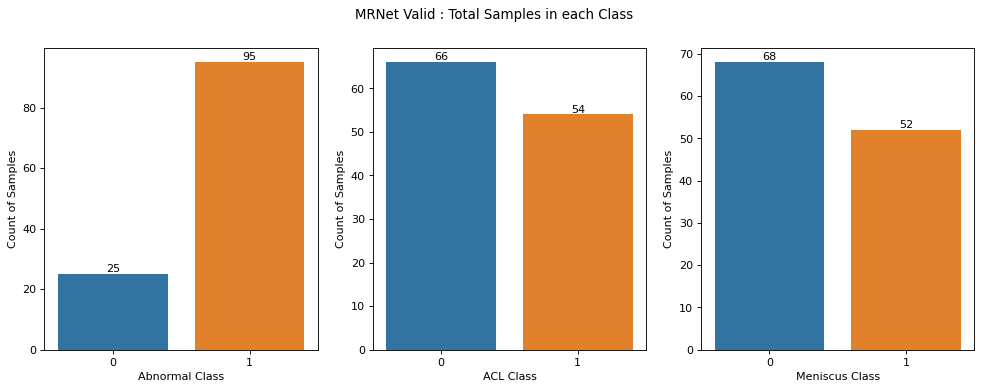

In [61]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5), dpi=80)
fig.suptitle('MRNet Valid : Total Samples in each Class')

# First graph
sns.countplot(data = valid_df, x='Abnormal', ax=ax[0])
ax[0].bar_label(ax[0].containers[0])
ax[0].set_xlabel('Abnormal Class')
ax[0].set_ylabel('Count of Samples')

# Second graph
sns.countplot(data = valid_df, x='ACL', ax=ax[1])
ax[1].bar_label(ax[1].containers[0])
ax[1].set_xlabel('ACL Class')
ax[1].set_ylabel('Count of Samples')

# Third graph
sns.countplot(data = valid_df, x='Meniscus', ax=ax[2])
ax[2].bar_label(ax[2].containers[0])
ax[2].set_xlabel('Meniscus Class')
ax[2].set_ylabel('Count of Samples')

plt.show()

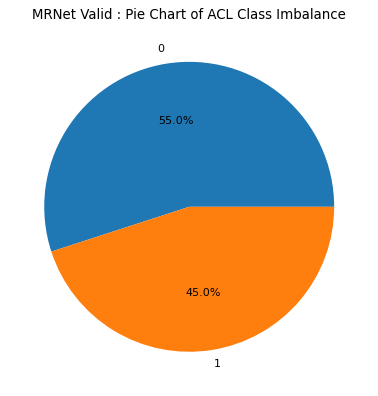

In [62]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=80)
ax.pie(x=valid_df['ACL'].value_counts(), 
       labels=valid_df['ACL'].value_counts().index,
       autopct='%.1f%%')
ax.set_title('MRNet Valid : Pie Chart of ACL Class Imbalance')
plt.show()

In [65]:
full_df

,Case,Abnormal,ACL,Meniscus
0,0000,1,0,0
1,0001,1,1,1
2,0002,1,0,0
3,0003,1,0,1
4,0004,1,0,0
...,...,...,...,...
1245,1245,1,1,1
1246,1246,1,1,1
1247,1247,1,0,1
1248,1248,1,1,1


### Combining both the datasets Train and Valid

In [63]:
full_df = pd.concat([train_df, valid_df], ignore_index=True)

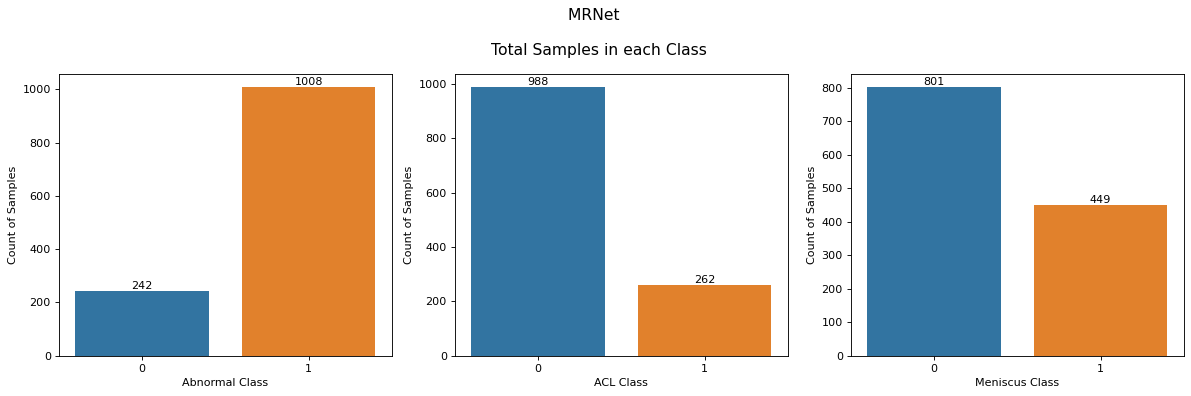

In [96]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5), dpi=80)
fig.suptitle('MRNet \n\n Total Samples in each Class', fontsize=14)

# First graph
sns.countplot(data = full_df, x='Abnormal', ax=ax[0])
ax[0].bar_label(ax[0].containers[0])
ax[0].set_xlabel('Abnormal Class')
ax[0].set_ylabel('Count of Samples')

# Second graph
sns.countplot(data = full_df, x='ACL', ax=ax[1])
ax[1].bar_label(ax[1].containers[0])
ax[1].set_xlabel('ACL Class')
ax[1].set_ylabel('Count of Samples')

# Third graph
sns.countplot(data = full_df, x='Meniscus', ax=ax[2])
ax[2].bar_label(ax[2].containers[0])
ax[2].set_xlabel('Meniscus Class')
ax[2].set_ylabel('Count of Samples')

fig.tight_layout()
plt.show()

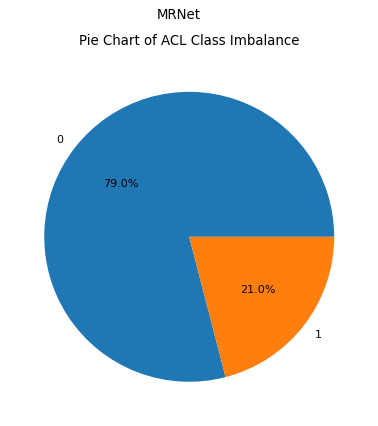

In [94]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=80)
fig.suptitle('MRNet', fontsize=14)
ax.pie(x=full_df['ACL'].value_counts(), 
       labels=full_df['ACL'].value_counts().index,
       autopct='%.1f%%')
ax.set_title('Pie Chart of ACL Class Imbalance', pad=10)
plt.show()

### Co-occurrence of Labels

In [54]:
# Assuming you have a Pandas DataFrame called train_df with the columns Abnormal, ACL, Meniscus, etc.

# Group by the three columns and calculate the total cases for each combination
grouped = train_df.groupby(['Abnormal', 'ACL', 'Meniscus']).size().reset_index(name='Total Cases')

# Calculate the total number of cases in the dataset
total_cases = grouped['Total Cases'].sum()

# Calculate the percentage of total cases for each combination
grouped['Percentage'] = np.round((grouped['Total Cases'] / total_cases) * 100, 2)

# Display the grouped DataFrame
print(grouped)

   Abnormal  ACL  Meniscus  Total Cases  Percentage
0         0    0         0          217       19.20
1         1    0         0          433       38.32
2         1    0         1          272       24.07
3         1    1         0           83        7.35
4         1    1         1          125       11.06


In [25]:
train_occurence_df = train_df.groupby(['Abnormal', 'ACL', 'Meniscus']).count()

In [26]:
train_occurence_df['Percent'] = np.round((train_occurence_df['Case']/train_occurence_df['Case'].sum())*100, 2)

In [27]:
train_occurence_df

Case  Percent
Abnormal ACL Meniscus               
0        0   0          217    19.20
1        0   0          433    38.32
             1          272    24.07
         1   0           83     7.35
             1          125    11.06

In [59]:
# Assuming you have a Pandas DataFrame called train_df with the columns Abnormal, ACL, Meniscus, etc.

# Group by the three columns and calculate the total cases for each combination
grouped = valid_df.groupby(['Abnormal', 'ACL', 'Meniscus']).size().reset_index(name='Total Cases')

# Calculate the total number of cases in the dataset
total_cases = grouped['Total Cases'].sum()

# Calculate the percentage of total cases for each combination
grouped['Percentage'] = np.round((grouped['Total Cases'] / total_cases) * 100, 2)

# Display the grouped DataFrame
print(grouped)

   Abnormal  ACL  Meniscus  Total Cases  Percentage
0         0    0         0           25       20.83
1         1    0         0           20       16.67
2         1    0         1           21       17.50
3         1    1         0           23       19.17
4         1    1         1           31       25.83


In [28]:
valid_occurence_df = valid_df.groupby(['Abnormal', 'ACL', 'Meniscus']).count()

In [29]:
valid_occurence_df['Percent'] = np.round((valid_occurence_df['Case'] / valid_occurence_df['Case'].sum()) * 100, 2)

In [30]:
valid_occurence_df

Case  Percent
Abnormal ACL Meniscus               
0        0   0           25    20.83
1        0   0           20    16.67
             1           21    17.50
         1   0           23    19.17
             1           31    25.83

### Combining both the datasets Train and Valid

In [68]:
# Assuming you have a Pandas DataFrame called train_df with the columns Abnormal, ACL, Meniscus, etc.

# Group by the three columns and calculate the total cases for each combination
grouped = full_df.groupby(['Abnormal', 'ACL', 'Meniscus']).size().reset_index(name='Total Cases')

# Calculate the total number of cases in the dataset
total_cases = grouped['Total Cases'].sum()

# Calculate the percentage of total cases for each combination
grouped['Percentage'] = np.round((grouped['Total Cases'] / total_cases) * 100, 2)

# Display the grouped DataFrame
print(grouped)

   Abnormal  ACL  Meniscus  Total Cases  Percentage
0         0    0         0          242       19.36
1         1    0         0          453       36.24
2         1    0         1          293       23.44
3         1    1         0          106        8.48
4         1    1         1          156       12.48


## After Pre-processing and Data Augmentation

In [72]:
mrnet_dataset_dir = 'Data/MRNet-v1.0'
mrnet_train_path = os.path.join(mrnet_dataset_dir, 'train')
mrnet_valid_path = os.path.join(mrnet_dataset_dir, 'valid')

preprocessed_mrnet_dataset_dir = 'Preprocessed_Data/MRNet-v1.0'
preprocessed_mrnet_train_path = os.path.join(preprocessed_mrnet_dataset_dir, 'train')
preprocessed_mrnet_valid_path = os.path.join(preprocessed_mrnet_dataset_dir, 'valid')

mrnet_planes = ['axial', 'coronal', 'sagittal']

# For running code on Windows
if platform.system() == "Windows":
    mrnet_dataset_dir = mrnet_dataset_dir.replace('/', '\\')
    mrnet_train_path = mrnet_train_path.replace('/', '\\')
    mrnet_valid_path = mrnet_valid_path.replace('/', '\\')
    
    preprocessed_mrnet_dataset_dir = preprocessed_mrnet_dataset_dir.replace('/', '\\')
    preprocessed_mrnet_train_path = preprocessed_mrnet_train_path.replace('/', '\\')
    preprocessed_mrnet_valid_path = preprocessed_mrnet_valid_path.replace('/', '\\')

In [73]:
mrnet_datasets = {'train': mrnet_train_path, 'valid': mrnet_valid_path}

In [74]:
mrnet_labels = ['abnormal', 'acl', 'meniscus']

In [75]:
# TRAIN DATASET
for label in mrnet_labels:
    if platform.system() == "Windows":
        if label == 'abnormal':
            train_abnormal_df = pd.read_csv(f"{mrnet_dataset_dir}\\train-{label}.csv",
                                            header=None,
                                            names=['Case', 'Abnormal'],
                                            dtype={'Case': str, 'Abnormal': np.int64})
        elif label == 'acl':
            train_acl_df = pd.read_csv(f"{mrnet_dataset_dir}\\train-{label}.csv",
                                       header=None,
                                       names=['Case', 'ACL'],
                                       dtype={'Case': str, 'ACL': np.int64})
        if label == 'meniscus':
            train_meniscus_df = pd.read_csv(f"{mrnet_dataset_dir}\\train-{label}.csv",
                                            header=None,
                                            names=['Case', 'Meniscus'],
                                            dtype={'Case': str, 'Meniscus': np.int64})
    else:
        if label == 'abnormal':
            train_abnormal_df = pd.read_csv(f"{mrnet_dataset_dir}/train-{label}.csv",
                                            header=None,
                                            names=['Case', 'Abnormal'],
                                            dtype={'Case': str, 'Abnormal': np.int64})
        elif label == 'acl':
            train_acl_df = pd.read_csv(f"{mrnet_dataset_dir}/train-{label}.csv",
                                       header=None,
                                       names=['Case', 'ACL'],
                                       dtype={'Case': str, 'ACL': np.int64})
        if label == 'meniscus':
            train_meniscus_df = pd.read_csv(f"{mrnet_dataset_dir}/train-{label}.csv",
                                            header=None,
                                            names=['Case', 'Meniscus'],
                                            dtype={'Case': str, 'Meniscus': np.int64})

train_df = pd.merge(train_abnormal_df, train_acl_df, on='Case').merge(train_meniscus_df, on='Case')

In [76]:
# VALID DATASET
for label in mrnet_labels:
    if platform.system() == "Windows":
        if label == 'abnormal':
            valid_abnormal_df = pd.read_csv(f"{mrnet_dataset_dir}\\valid-{label}.csv",
                                            header=None,
                                            names=['Case', 'Abnormal'],
                                            dtype={'Case': str, 'Abnormal': np.int64})
        elif label == 'acl':
            valid_acl_df = pd.read_csv(f"{mrnet_dataset_dir}\\valid-{label}.csv",
                                       header=None,
                                       names=['Case', 'ACL'],
                                       dtype={'Case': str, 'ACL': np.int64})
        if label == 'meniscus':
            valid_meniscus_df = pd.read_csv(f"{mrnet_dataset_dir}\\valid-{label}.csv",
                                            header=None,
                                            names=['Case', 'Meniscus'],
                                            dtype={'Case': str, 'Meniscus': np.int64})
    else:
        if label == 'abnormal':
            valid_abnormal_df = pd.read_csv(f"{mrnet_dataset_dir}/valid-{label}.csv",
                                            header=None,
                                            names=['Case', 'Abnormal'],
                                            dtype={'Case': str, 'Abnormal': np.int64})
        elif label == 'acl':
            valid_acl_df = pd.read_csv(f"{mrnet_dataset_dir}/valid-{label}.csv",
                                       header=None,
                                       names=['Case', 'ACL'],
                                       dtype={'Case': str, 'ACL': np.int64})
        if label == 'meniscus':
            valid_meniscus_df = pd.read_csv(f"{mrnet_dataset_dir}/valid-{label}.csv",
                                            header=None,
                                            names=['Case', 'Meniscus'],
                                            dtype={'Case': str, 'Meniscus': np.int64})

valid_df = pd.merge(valid_abnormal_df, valid_acl_df, on='Case').merge(valid_meniscus_df, on='Case')

In [77]:
# AUGMENTED TRAIN LABELS
if platform.system() == "Windows":
    train_aug_df = pd.read_csv(f"{mrnet_dataset_dir}\\train-aug.csv",
                               index_col=0,
                               dtype={'Case': str, 'Abnormal': np.int64, 'ACL': np.int64, 'Meniscus': np.int64})
else:
    train_aug_df = pd.read_csv(f"{mrnet_dataset_dir}/train-aug.csv",
                               index_col=0,
                               dtype={'Case': str, 'Abnormal': np.int64, 'ACL': np.int64, 'Meniscus': np.int64})

In [78]:
# AUGMENTED VALID LABELS
if platform.system() == "Windows":
    valid_aug_df = pd.read_csv(f"{mrnet_dataset_dir}\\valid-aug.csv",
                               index_col=0,
                               dtype={'Case': str, 'Abnormal': np.int64, 'ACL': np.int64, 'Meniscus': np.int64})
else:
    valid_aug_df = pd.read_csv(f"{mrnet_dataset_dir}/valid-aug.csv",
                               index_col=0,
                               dtype={'Case': str, 'Abnormal': np.int64, 'ACL': np.int64, 'Meniscus': np.int64})

In [79]:
full_mrnet_df = pd.concat([train_df, valid_df, train_aug_df, valid_aug_df], ignore_index=True)

In [80]:
len(full_mrnet_df)

2080

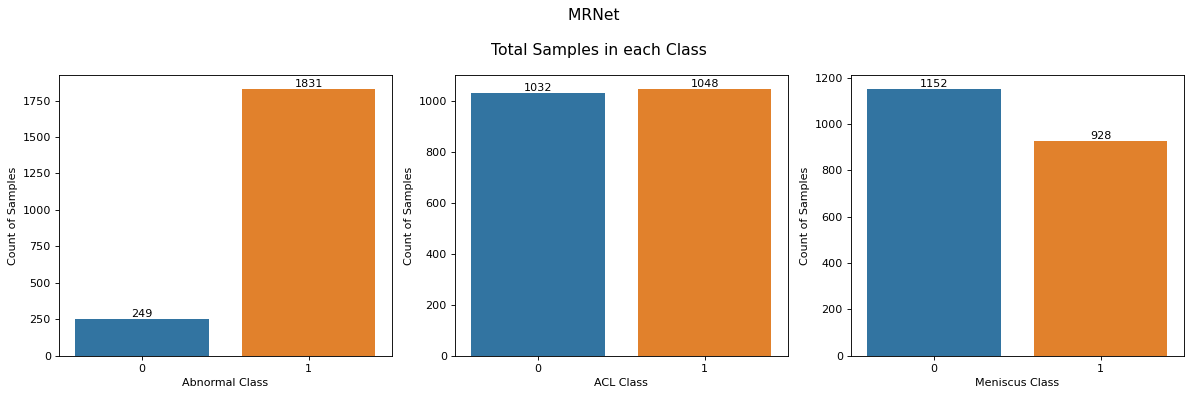

In [93]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5), dpi=80)
fig.suptitle('MRNet \n\n Total Samples in each Class', fontsize=14)

# First graph
sns.countplot(data = full_mrnet_df, x='Abnormal', ax=ax[0])
ax[0].bar_label(ax[0].containers[0])
ax[0].set_xlabel('Abnormal Class')
ax[0].set_ylabel('Count of Samples')

# Second graph
sns.countplot(data = full_mrnet_df, x='ACL', ax=ax[1])
ax[1].bar_label(ax[1].containers[0])
ax[1].set_xlabel('ACL Class')
ax[1].set_ylabel('Count of Samples')

# Third graph
sns.countplot(data = full_mrnet_df, x='Meniscus', ax=ax[2])
ax[2].bar_label(ax[2].containers[0])
ax[2].set_xlabel('Meniscus Class')
ax[2].set_ylabel('Count of Samples')

fig.tight_layout()
plt.show()

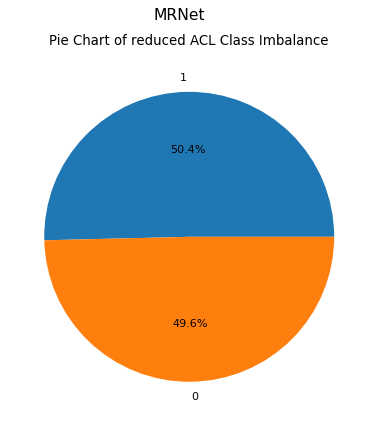

In [88]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=80)
fig.suptitle('MRNet', fontsize=14)
ax.pie(x=full_mrnet_df['ACL'].value_counts(), 
       labels=full_mrnet_df['ACL'].value_counts().index,
       autopct='%.1f%%')
ax.set_title('Pie Chart of reduced ACL Class Imbalance', pad=10)
plt.show()